In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import dataset
dataset = pd.read_csv('diabetes_data_upload.csv')

In [3]:
dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
#Check column and row numbers
dataset.shape

(520, 17)

In [5]:
#Check information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [6]:
#Check data number of each columns
dataset.count()

Age                   520
Gender                520
Polyuria              520
Polydipsia            520
sudden weight loss    520
weakness              520
Polyphagia            520
Genital thrush        520
visual blurring       520
Itching               520
Irritability          520
delayed healing       520
partial paresis       520
muscle stiffness      520
Alopecia              520
Obesity               520
class                 520
dtype: int64

In [7]:
#check missing values
dataset.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [8]:
#Let's Encode the dataset for more analysis
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in dataset.columns:
    if dataset[col].dtype == np.number:
        continue
    else:
        dataset[col] = le.fit_transform(dataset[col])

In [9]:
dataset.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,15,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,24,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,34,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,8,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
519,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Figure size 864x720 with 0 Axes>

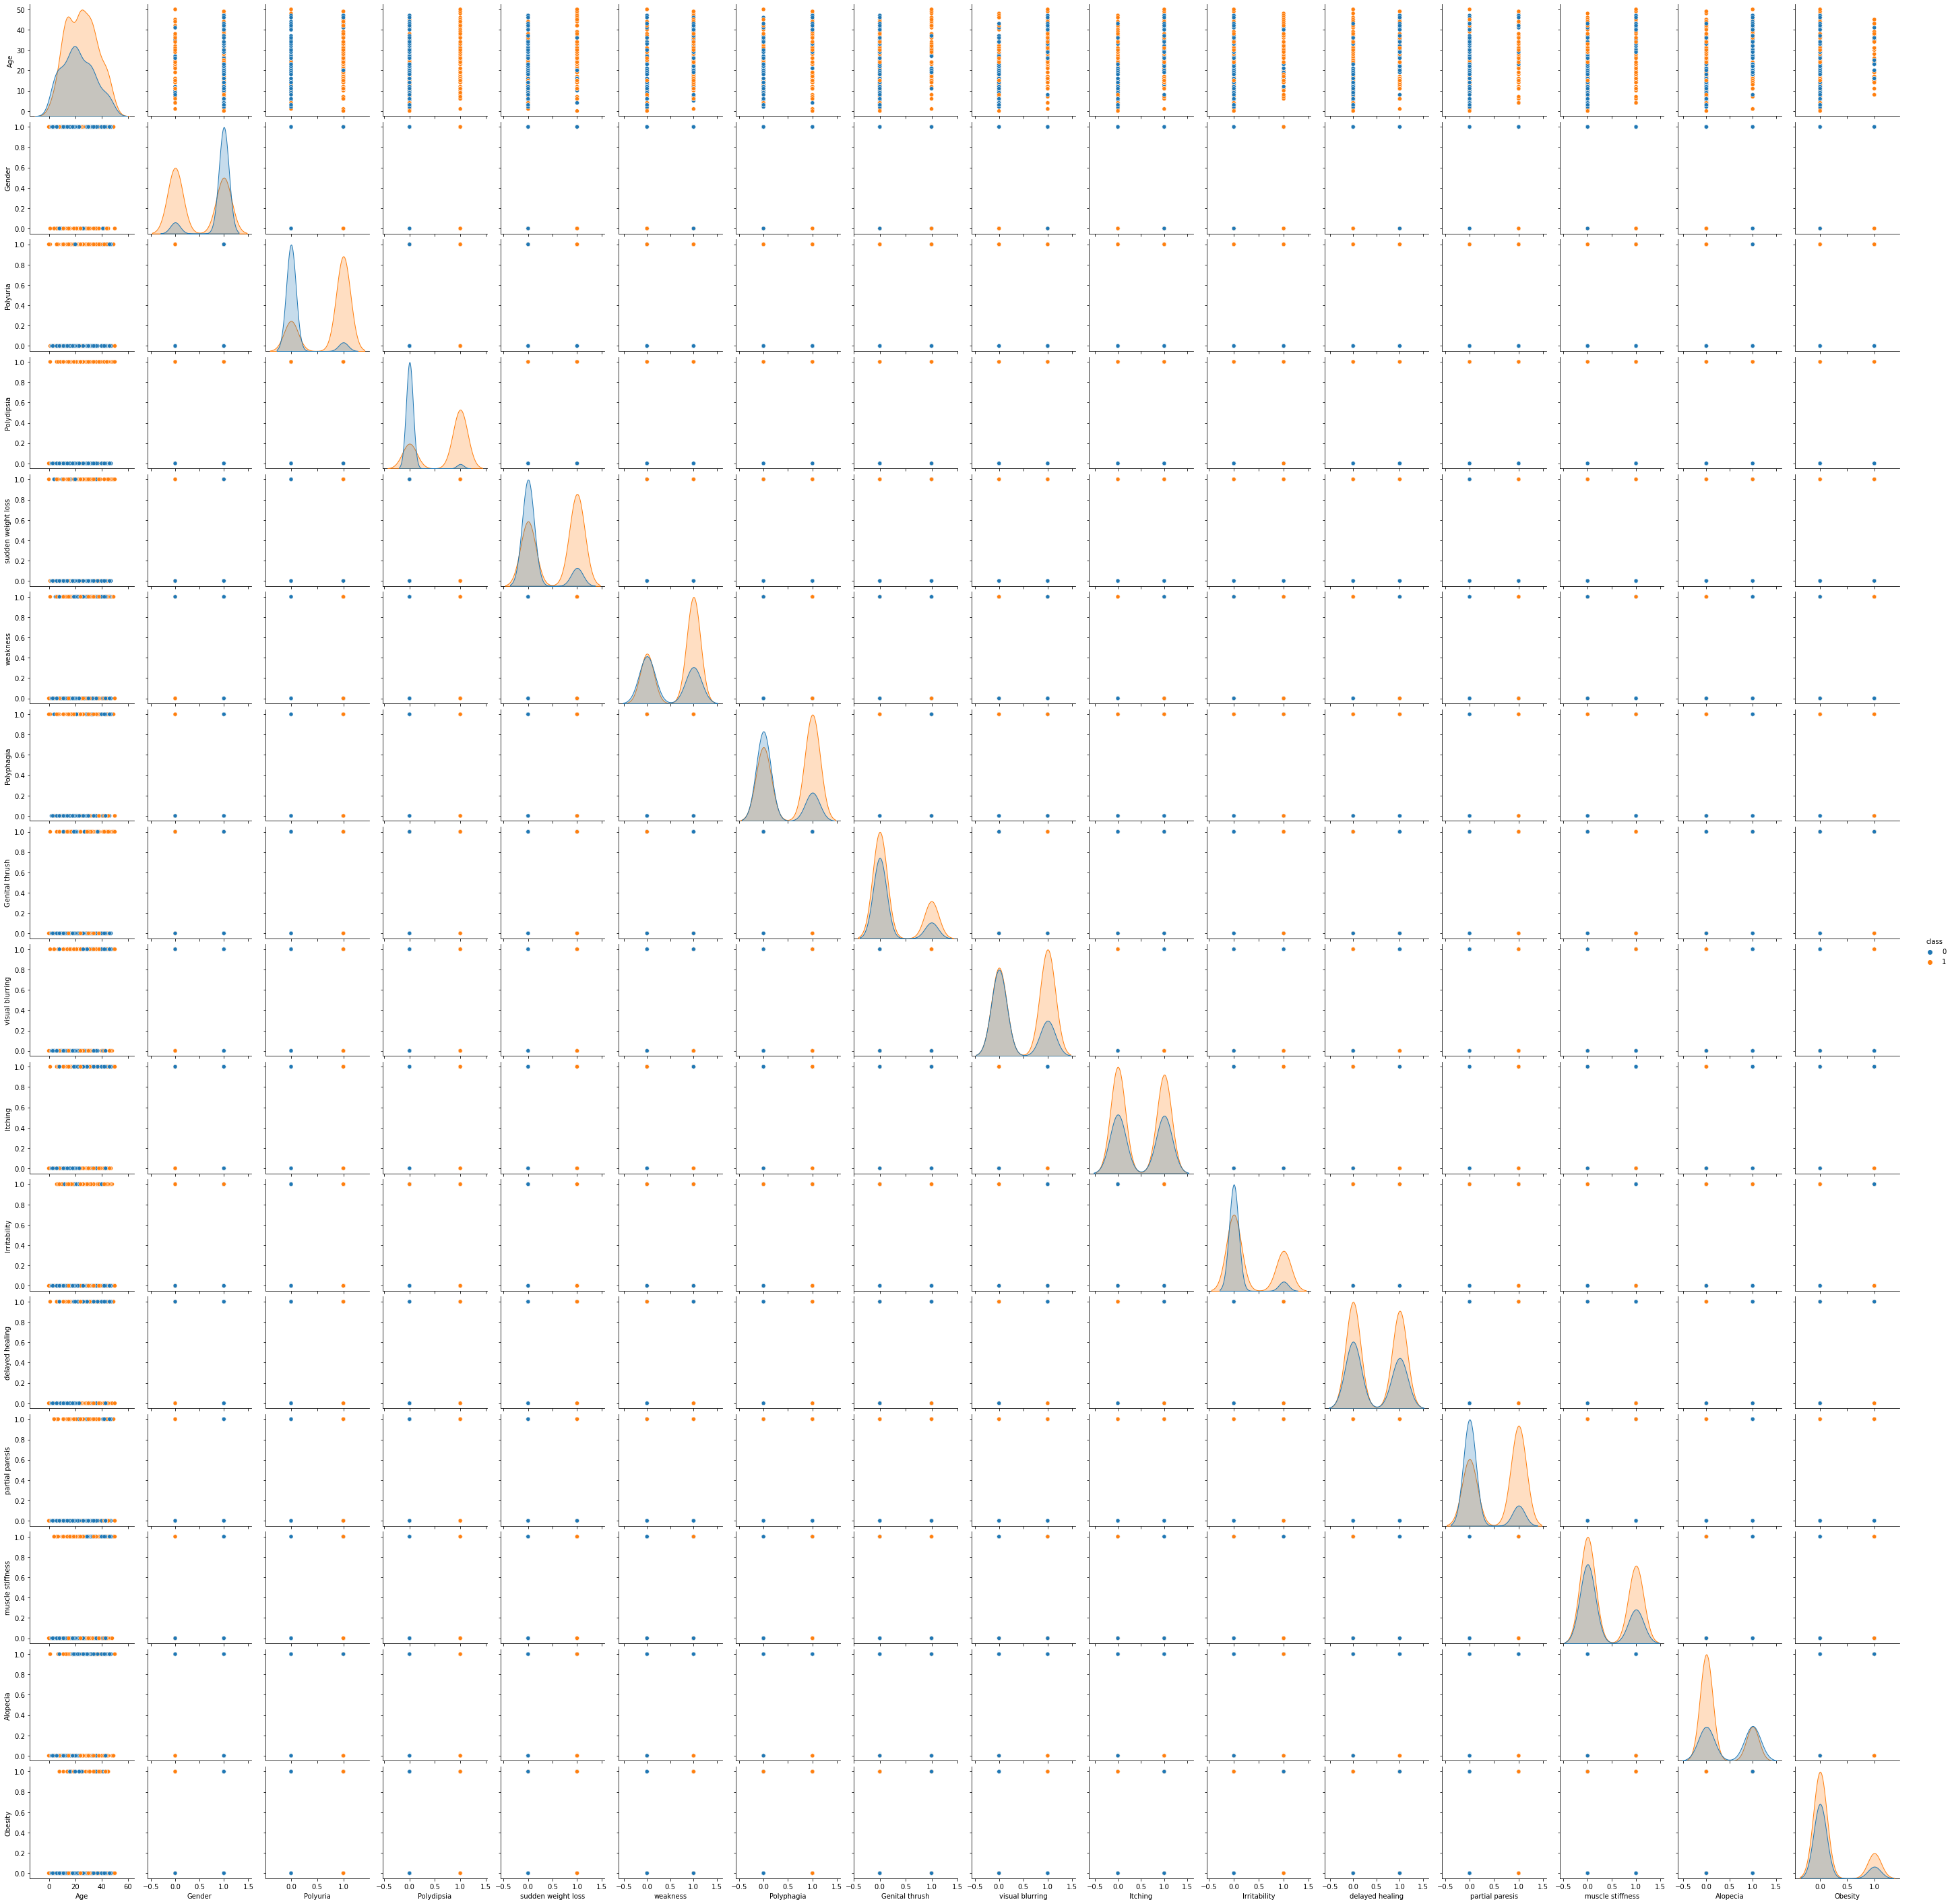

In [10]:
plt.figure(figsize=(12,10))
sns.pairplot(data=dataset, hue='class')

In [11]:
#Let's do exploratory data analysis using Pandas Profiling
    #Step 1: Import Library
    #Step 2: Create Analytical profile for this dataset
import pandas_profiling.profile_report as ProfileReport
dataset.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
#Select the Dependent and Independent Feature for depth analysis
X = dataset.drop(['class'], axis=1)
y = dataset['class']

In [13]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [14]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [15]:
#Split the dataset now
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
print(X_train.shape)
print(X_test.shape)

(364, 16)
(156, 16)


In [16]:
y_test.shape

(156,)

In [17]:
#Explore the data using Decision Tree Alogrithm
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1])

[Text(0.7274305555555556, 0.95, 'Polydipsia <= 0.5\ngini = 0.476\nsamples = 364\nvalue = [142, 222]'),
 Text(0.5104166666666666, 0.85, 'Polyuria <= 0.5\ngini = 0.438\nsamples = 204\nvalue = [138, 66]'),
 Text(0.2986111111111111, 0.75, 'Gender <= 0.5\ngini = 0.318\nsamples = 156\nvalue = [125, 31]'),
 Text(0.1388888888888889, 0.65, 'Alopecia <= 0.5\ngini = 0.478\nsamples = 33\nvalue = [13, 20]'),
 Text(0.08333333333333333, 0.55, 'Age <= 13.0\ngini = 0.287\nsamples = 23\nvalue = [4, 19]'),
 Text(0.05555555555555555, 0.45, 'Age <= 6.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.027777777777777776, 0.35, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.08333333333333333, 0.35, 'Age <= 10.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.05555555555555555, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.1111111111111111, 0.25, 'weakness <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.08333333333333333, 0.15, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')

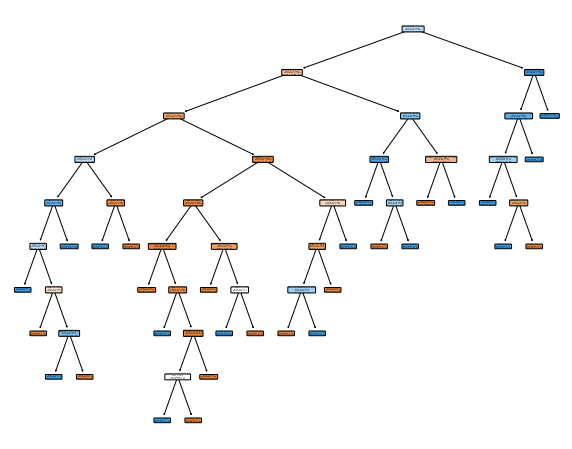

In [18]:
from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(dtc, feature_names=X.columns, rounded=True, filled=True)

In [24]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error

acc = accuracy_score(y_test, y_pred)
acc


0.9615384615384616

In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[54,  4],
       [ 2, 96]])

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.96      0.98      0.97        98

    accuracy                           0.96       156
   macro avg       0.96      0.96      0.96       156
weighted avg       0.96      0.96      0.96       156



              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.96      0.98      0.97        98

    accuracy                           0.96       156
   macro avg       0.96      0.96      0.96       156
weighted avg       0.96      0.96      0.96       156

MSE for kNN uniform:  0.038461538461538464
Traning Accuracy for kNN uniform:  1.0
Testing Accuracy kNN uniform:  0.9615384615384616


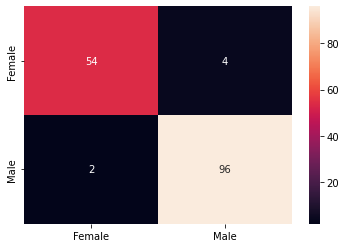

In [25]:
class_name = ['Female', 'Male']
cm1 = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=class_name, index=class_name)
sns.heatmap(cm1, annot=True, fmt='d')
print(classification_report(y_test, y_pred))

print("MSE for kNN uniform: ", mean_squared_error(y_test, y_pred)) # The mean squared error
print ("Traning Accuracy for kNN uniform: ", dtc.score(X_train, y_train)) # Check training accuracy
print ("Testing Accuracy kNN uniform: ", dtc.score(X_test, y_test)) # Check testing accuracy